### Тема “Обучение с учителем”

In [138]:
# Задание 1
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и Y из этих данных.
# Разбейте эти датафреймы н а тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из 
# модуля sklearn.linear_model
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
# Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from matplotlib import pyplot as plt

boston = load_boston()
# print(boston.keys())
# print(boston['DESCR'])
# print(boston['feature_names'])
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

x = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
check_test1 = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten()
})
# print(check_test1)
# r2_check = r2_score(check_test1['y_test'], check_test1['y_pred'])
# print(r2_check)

r2 = r2_score(y_test, y_pred)
r2


# ?r2_score

0.7112260057484973

In [71]:
# Задание 2
# Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000,
# max_depth должен быть равен 12 и random_state сделайте равным 42.
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
# чтобы получить из датафрейма одномерный массив Numpy,
# так как для класса RandomForestRegressor в данном методе для аргумента y 
# предпочтительно применение массивов вместо датафрейма.
# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.



model = RandomForestRegressor(n_estimators=1000,max_depth=12,random_state=42)
model.fit(X_train, y_train.values[:, 0])

y_pred_RFR = model.predict(X_test)

r2_RFR = r2_score(y_test, y_pred_RFR)
r2_RFR

print(f'Лучше работает вторая модель(деревья), т.к. коэффициент детерминации больше во второй модели({r2_RFR} против {r2})')



Лучше работает вторая модель(деревья), т.к. коэффициент детерминации больше во второй модели(0.87472606157312 против 0.7112260057484973)


In [81]:
# *Задание 3
# Вызовите документацию для класса RandomForestRegressor,
# найдите информацию об атрибуте feature_importances_.
# С помощью этого атрибута найдите сумму всех показателей важности,
# установите, какие два признака показывают наибольшую важность.


# ?RandomForestRegressor
# print(model.feature_importances_)

feature_importance = pd.DataFrame({'feature_importance': model.feature_importances_,
                                  'features':feature_names})
feature_importance.nlargest(2, 'feature_importance')
# print(boston['DESCR'])

,feature_importance,features
12,0.415847,LSTAT
5,0.402682,RM


In [128]:
# *Задание 4
# В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию 
# по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.
# Для этого датасета мы будем решать задачу классификации - будем определять,
# какие из транзакциции по кредитной карте являются мошенническими. 
# Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),
# так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
# Мы будем вычислять AUC, то есть площадь под кривой ROC.

# Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
# Загрузите датасет creditcard.csv и создайте датафрейм df.
# С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
# Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
# Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
# pd.options.display.max_columns = 100.
# Просмотрите первые 10 строк датафрейма df.
# Создайте датафрейм X из датафрейма df, исключив столбец Class.
# Создайте объект Series под названием y из столбца Class.
# Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, 
# используя аргументы: test_size=0.3, random_state=100, stratify=y.
# У вас должны получиться объекты X_train, X_test, y_train и y_test.
# Просмотрите информацию о их форме.
# Для поиска по сетке параметров задайте такие параметры:
# parameters = [{'n_estimators': [10, 15],
# 'max_features': np.arange(3, 5),
# 'max_depth': np.arange(4, 7)}]

# Создайте модель GridSearchCV со следующими аргументами:
# estimator=RandomForestClassifier(random_state=100),
# param_grid=parameters,
# scoring='roc_auc',
# cv=3.

# Обучите модель на тренировочном наборе данных (может занять несколько минут).
# Просмотрите параметры лучшей модели с помощью атрибута best_params_.
# Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
# Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и 
# запишите в массив y_pred_proba. 

# Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, 
# используя в качестве аргументов массивы y_test и y_pred_proba.

path = 'C:/Users/79031/Desktop/GeekBrains/DB/creditcard.csv'
df_fraud = pd.read_csv(path)
# print(df_fraud['Class'].value_counts(normalize=True))
# print(df_fraud.info())
pd.options.display.max_columns = 100
df_fraud.head(10)

X_df = df_fraud.drop(columns='Class')
y_series = pd.Series(df_fraud['Class'])

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
                                                             X_df, 
                                                             y_series, 
                                                             test_size=0.3, 
                                                             random_state=100, 
                                                             stratify=y_series
                                                             ) 
# print(f"X_train_credit - {X_train_credit.shape}\nX_test_credit.shape - {X_test_credit.shape}\ny_train_credit.shape - {y_train_credit.shape}\ny_test_credit.shape - {y_test_credit.shape}")

parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3
)

clf.fit(X_train_credit, y_train_credit)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [146]:
print(f'best_params {clf.best_params_}')
y_pred = clf.predict_proba(X_test_credit)
y_pred_proba = y_pred[:, 1]
#  y_pred_proba[:5]
# plt.hist(y_pred_proba[y_test_credit == 1], bins=7, density=True, label='class 1', alpha=0.5)
# plt.hist(y_pred_proba[y_test_credit == 0], bins=7, density=True, label='class 0', alpha=0.5)

# plt.xlabel("Probability")
# plt.ylabel("Density")

# plt.legend()
print(f'AUC равен {roc_auc_score(y_test_credit, y_pred_proba)}')

best_params {'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
AUC равен 0.9462664156037156


### Дополнительные задания

In [185]:
# Задание 1 
# Загрузите датасет Wine из встроенных датасетов sklearn.datasets
# с помощью функции load_wine в переменную data
from sklearn.datasets import load_wine
import seaborn as sns

data_wine = load_wine()

In [166]:
# Задание 2
# Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. 
# Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

print(type(data_wine))
data_keys = data_wine.keys()
data_keys

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [169]:
# Задание 3
# Просмотрите данные, описание и названия признаков в датасете. 
# Описание нужно вывести в виде привычного, аккуратно оформленного текста, 
# без обозначений переноса строки, но с самими переносами и т.д.
print(data_wine['DESCR'],'\n')
print(f"data:\n{data_wine['data']}\n")
print(f"feature_names:\n{data_wine['feature_names']}\n")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [170]:
# Задание 4 
# Сколько классов содержит целевая переменная датасета? Выведите названия классов.
print(f"{len(data_wine['target_names'])} класса(-ов) содержит целевая переменная\nНазвания: {data_wine['target_names']} ")

3 класса(-ов) содержит целевая переменная
Названия: ['class_0' 'class_1' 'class_2'] 


In [171]:
# Задание 5
# На основе данных датасета (они содержатся в двумерном массиве Numpy) и 
# названий признаков создайте датафрейм под названием X.
X_wine_df = pd.DataFrame(data_wine['data'], columns=data_wine['feature_names'])
X_wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [174]:
# Задание 6
# Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
print(X_wine_df.shape, X_wine_df.size)
X_wine_df.info()

(178, 13) 2314
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    flo

In [179]:
# Задание 7
# Добавьте в датафрейм поле с классами вин в виде чисел, 
# имеющих тип данных numpy.int64. Название поля - 'target'.
target_wine = data_wine['target'].astype('int64')
X_wine_df['target'] = target_wine
X_wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


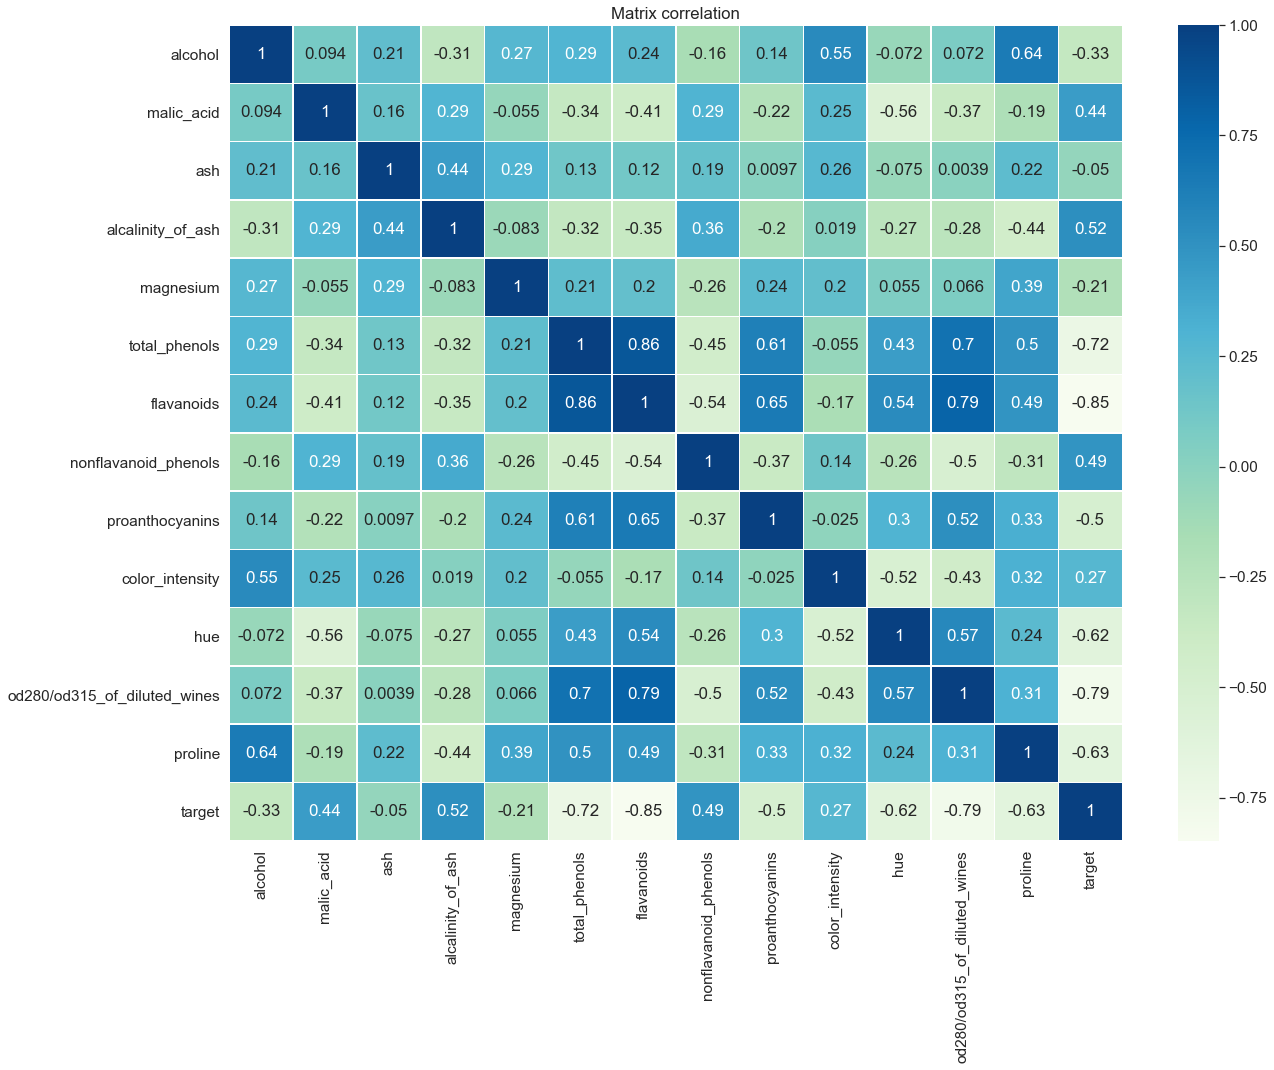

In [194]:
# Задание 8
# Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
X_wine_corr = X_wine_df.corr()
sns.heatmap(X_wine_df.corr(), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Matrix correlation')
plt.show()

In [207]:
# Задание 9
# Создайте список high_corr из признаков, корреляция которых с полем target 
# по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

high_corr = X_wine_corr.loc[(abs(X_wine_corr['target']) > 0.5) & (X_wine_corr.index != 'target'), X_wine_corr.columns != 'target']
high_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
hue,-0.071747,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183
od280/od315_of_diluted_wines,0.072343,-0.368710,0.003911,-0.276769,0.066004,0.699949,0.787194,-0.503270,0.519067,-0.428815,0.565468,1.000000,0.312761
proline,0.643720,-0.192011,0.223626,-0.440597,0.393351,0.498115,0.494193,-0.311385,0.330417,0.316100,0.236183,0.312761,1.000000


In [239]:
# Задание 10
# Удалите из датафрейма X поле с целевой переменной. 
# Для всех признаков, названия которых содержатся в списке high_corr,
# вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', 
# добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, 
# которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. 
# Выведите описание полей датафрейма X с помощью метода describe.
X_wine_df = X_wine_df.drop(columns='target')
X_wine_df
for line in high_corr:
    for value in high_corr[line]:
#         print(f"{line} {value ** 2}")
        X_wine_df[f'{line}_2'] = value * value
X_wine_df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_2,malic_acid_2,ash_2,alcalinity_of_ash_2,magnesium_2,total_phenols_2,flavanoids_2,nonflavanoid_phenols_2,proanthocyanins_2,color_intensity_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.0
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,7.236806e-16,8.350161e-17,1.322109e-16,6.401790e-16,6.401790e-16,5.566774e-16,3.061726e-16,1.530863e-16,1.670032e-16,2.644218e-16,9.046008e-17,3.757573e-16,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,4.143755e-01,3.686806e-02,5.000871e-02,1.941257e-01,1.547249e-01,2.481184e-01,2.442268e-01,9.696074e-02,1.091752e-01,9.991928e-02,5.578262e-02,9.781949e-02,1.0
